In [2]:
#A1
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

def load_data(file_path):

    return pd.read_csv(file_path)

def preprocess_data(data):

    # Replace NaN values with the mean of each column
    data = data.fillna(data.mean())

    # One-hot encode categorical variables
    data = pd.get_dummies(data, columns=['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area'], drop_first=True)

    # Fill NaN values in 'Dependents' column with a default value (e.g., 0)
    data['Dependents'] = data['Dependents'].fillna(0)

    # Convert 'Dependents' column to numerical values
    data['Dependents'] = data['Dependents'].replace({'3+': 3}).astype(int)

    X = data.drop(['Loan_ID', 'Loan_Status'], axis=1)
    y = data['Loan_Status'].map({'Y': 1, 'N': 0})
    return X, y

def train_and_evaluate(X_train, y_train, X_test, y_test):

    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train, y_train)

    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    cm_train = confusion_matrix(y_train, y_train_pred)
    cm_test = confusion_matrix(y_test, y_test_pred)

    precision_train = precision_score(y_train, y_train_pred)
    recall_train = recall_score(y_train, y_train_pred)
    f1_train = f1_score(y_train, y_train_pred)

    precision_test = precision_score(y_test, y_test_pred)
    recall_test = recall_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred)

    return cm_train, cm_test, precision_train, recall_train, f1_train, precision_test, recall_test, f1_test

if __name__ == "__main__":
    # Load data
    file_path = '/content/loan-train.csv'
    data = load_data(file_path)

    # Preprocess data
    X, y = preprocess_data(data)

    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train and evaluate the model
    cm_train, cm_test, precision_train, recall_train, f1_train, precision_test, recall_test, f1_test = train_and_evaluate(X_train, y_train, X_test, y_test)

    # Print results
    print("Confusion Matrix (Training Set):\n", cm_train)
    print("Precision (Training Set):", precision_train)
    print("Recall (Training Set):", recall_train)
    print("F1-Score (Training Set):", f1_train)

    print("\nConfusion Matrix (Test Set):\n", cm_test)
    print("Precision (Test Set):", precision_test)
    print("Recall (Test Set):", recall_test)
    print("F1-Score (Test Set):", f1_test)


<ipython-input-2-908d4bc53b14>:14: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


Confusion Matrix (Training Set):
 [[149   0]
 [  0 342]]
Precision (Training Set): 1.0
Recall (Training Set): 1.0
F1-Score (Training Set): 1.0

Confusion Matrix (Test Set):
 [[19 24]
 [ 3 77]]
Precision (Test Set): 0.7623762376237624
Recall (Test Set): 0.9625
F1-Score (Test Set): 0.8508287292817679


In [3]:

#A2
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def load_stock_data(file_path, sheet_name):

    return pd.read_excel(file_path, sheet_name)

def generate_random_predictions(actual_prices):

    np.random.seed(42)  # for reproducibility
    return actual_prices * (1 + 0.02 * np.random.randn(len(actual_prices)))

def calculate_metrics(actual, predicted):

    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    mape = mean_absolute_error(actual, predicted) / np.mean(np.abs(actual)) * 100
    r2 = r2_score(actual, predicted)
    return mse, rmse, mape, r2

if __name__ == "__main__":
    # Load stock data from Excel file
    file_path = '/content/Lab3PurchaseData.xlsx'
    df_stock = load_stock_data(file_path, sheet_name='IRCTC Stock Price')

    # Assuming 'Price' column is the actual stock prices
    actual_prices = df_stock['Price']

    # Generate random predictions for demonstration purposes
    predicted_prices = generate_random_predictions(actual_prices)

    # Calculate metrics
    mse, rmse, mape, r2 = calculate_metrics(actual_prices, predicted_prices)

    # Display results
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
    print(f"R2 Score: {r2}")

    # Analyze the results based on the obtained metrics
    # You can add your analysis based on the calculated metrics.
    # Lower MSE and RMSE values indicate better model performance.
    # Lower MAPE values indicate better accuracy.
    # Closer R2 score to 1 indicates a better fit.


Mean Squared Error (MSE): 921.7961868770038
Root Mean Squared Error (RMSE): 30.36109660201693
Mean Absolute Percentage Error (MAPE): 1.5226298052625966%
R2 Score: 0.9842418553819514


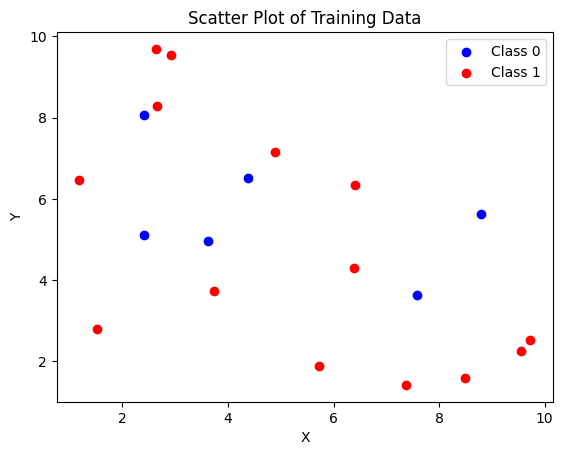

In [4]:
# A3
import numpy as np
import matplotlib.pyplot as plt

def generate_random_data_points(num_points=20, seed=42):

    np.random.seed(seed)
    X = np.random.uniform(1, 10, num_points)
    Y = np.random.uniform(1, 10, num_points)
    classes = np.random.randint(2, size=num_points)
    return X, Y, classes

def plot_scatter_plot(X, Y, classes):

    plt.scatter(X[classes == 0], Y[classes == 0], c='blue', label='Class 0')
    plt.scatter(X[classes == 1], Y[classes == 1], c='red', label='Class 1')

    # Set plot labels and legend
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Scatter Plot of Training Data')
    plt.legend()

    # Show the plot
    plt.show()

if __name__ == "__main__":
    # Generate random data points
    X, Y, classes = generate_random_data_points()

    # Plot scatter plot
    plot_scatter_plot(X, Y, classes)


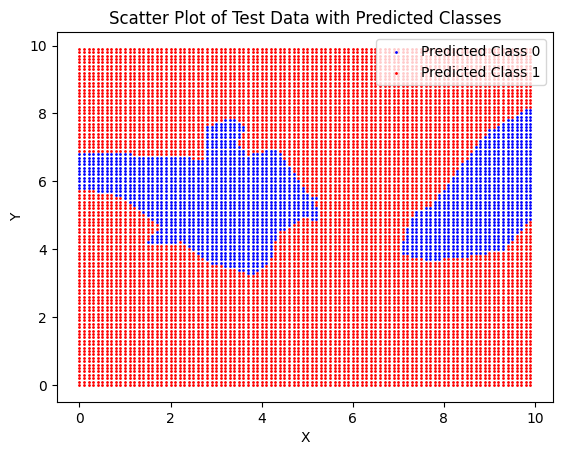

In [6]:
# A4
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

def generate_test_data():

    test_X, test_Y = np.meshgrid(np.arange(0, 10, 0.1), np.arange(0, 10, 0.1))
    test_data = np.column_stack((test_X.ravel(), test_Y.ravel()))
    return test_X, test_Y, test_data

def train_knn_classifier(X, Y, classes, k=3):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(np.column_stack((X, Y)), classes)
    return knn_classifier

def plot_predicted_classes(test_data, predicted_classes):
    plt.scatter(test_data[predicted_classes == 0, 0], test_data[predicted_classes == 0, 1], c='blue', s=1, label='Predicted Class 0')
    plt.scatter(test_data[predicted_classes == 1, 0], test_data[predicted_classes == 1, 1], c='red', s=1, label='Predicted Class 1')

    # Set plot labels and legend
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Scatter Plot of Test Data with Predicted Classes')
    plt.legend()

    # Show the plot
    plt.show()

if __name__ == "__main__":
    # Generate test data
    test_X, test_Y, test_data = generate_test_data()

    # Initialize and fit kNN classifier with training data
    knn_classifier = train_knn_classifier(X, Y, classes, k=3)

    # Predict classes for the test data
    predicted_classes = knn_classifier.predict(test_data)

    # Plot scatter plot with predicted classes
    plot_predicted_classes(test_data, predicted_classes)


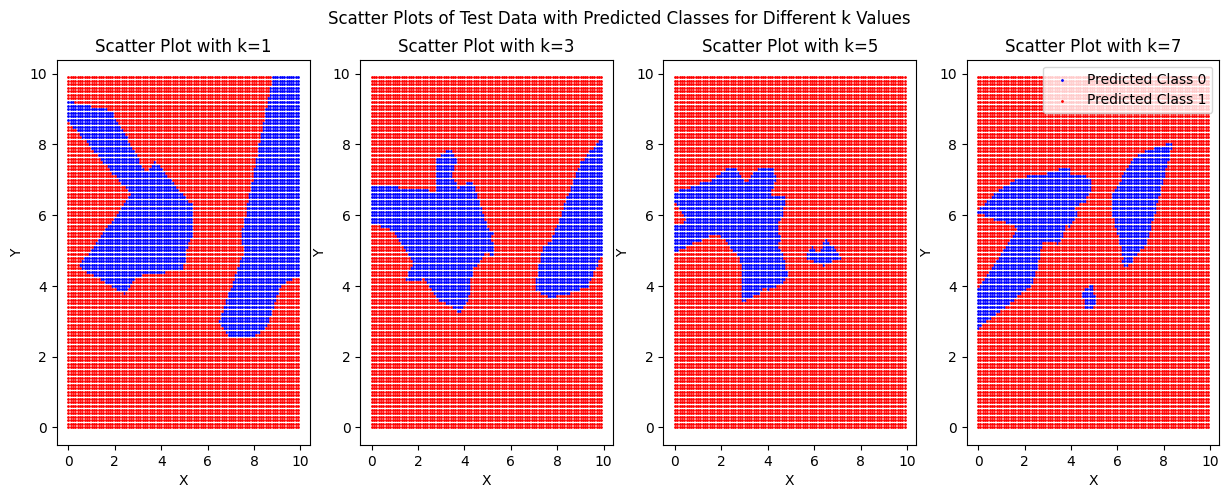

In [8]:
# A5
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

def generate_test_data():
    test_X, test_Y = np.meshgrid(np.arange(0, 10, 0.1), np.arange(0, 10, 0.1))
    test_data = np.column_stack((test_X.ravel(), test_Y.ravel()))
    return test_X, test_Y, test_data

def train_and_predict_knn_classifier(X, Y, classes, k):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(np.column_stack((X, Y)), classes)
    return clf.predict(test_data)

def plot_scatter_plot_with_predicted_classes(ax, predicted_classes, k):
    ax.scatter(test_data[predicted_classes == 0, 0], test_data[predicted_classes == 0, 1], c='blue', s=1, label='Predicted Class 0')
    ax.scatter(test_data[predicted_classes == 1, 0], test_data[predicted_classes == 1, 1], c='red', s=1, label='Predicted Class 1')

    # Set plot labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title(f'Scatter Plot with k={k}')

if __name__ == "__main__":
    # Generate test data
    test_X, test_Y, test_data = generate_test_data()

    # Initialize kNN classifiers with different values of k
    k_values = [1, 3, 5, 7]
    classifiers = [train_and_predict_knn_classifier(X, Y, classes, k) for k in k_values]

    # Create subplots for each k value
    fig, axes = plt.subplots(1, len(k_values), figsize=(15, 5))

    for i, (k, predicted_classes) in enumerate(zip(k_values, classifiers)):
        # Plot scatter plot with predicted classes
        plot_scatter_plot_with_predicted_classes(axes[i], predicted_classes, k)

    # Set overall title and legend
    fig.suptitle('Scatter Plots of Test Data with Predicted Classes for Different k Values')
    plt.legend()

    # Show the plots
    plt.show()


<ipython-input-12-d09d0d4e8266>:11: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


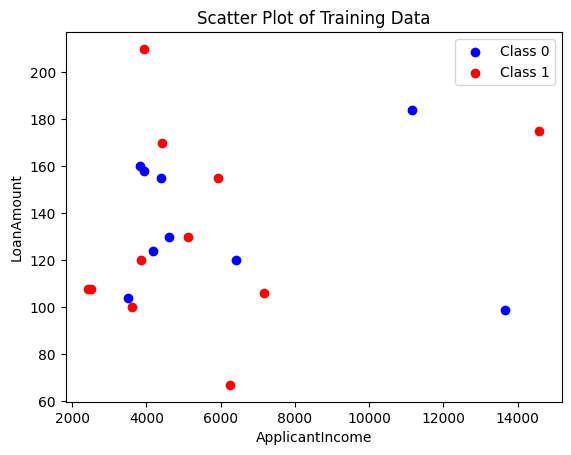

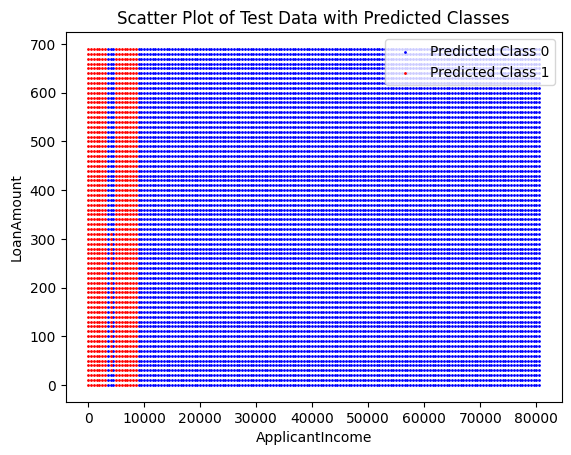

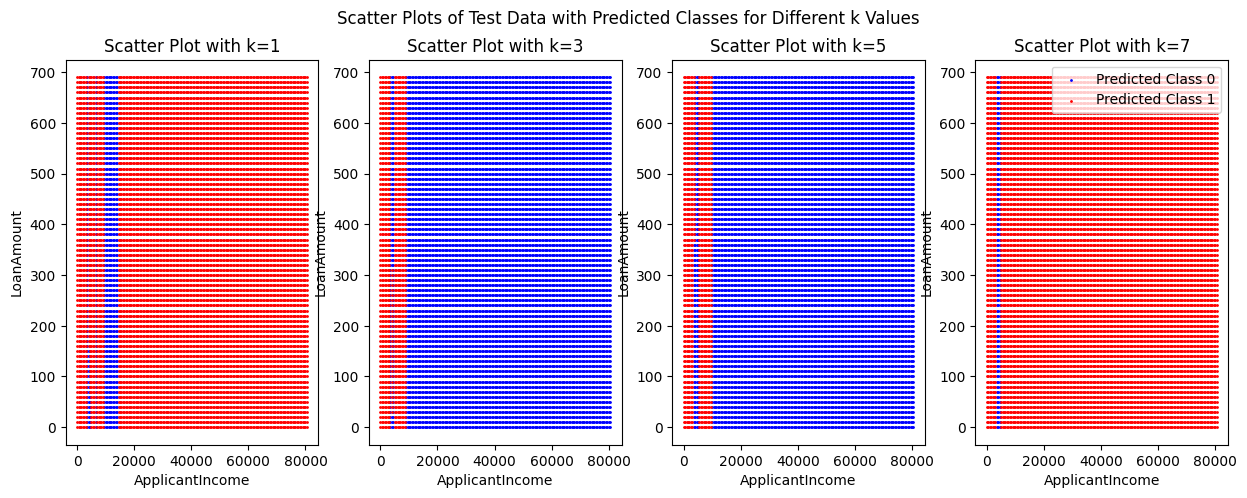

In [12]:
# A6
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

file_path = '/content/loan-train.csv'
df = pd.read_csv(file_path)

# Replace missing values with the mean of the respective column
df.fillna(df.mean(), inplace=True)

# Select two features ('ApplicantIncome' and 'LoanAmount') and assign them to X and Y
X_train = df['ApplicantIncome'].sample(20).values
Y_train = df['LoanAmount'].sample(20).values

# Assign points to two classes (class 0 - Blue and class 1 - Red)
classes_train = np.random.randint(2, size=20)

# Scatter plot with colors based on class
plt.scatter(X_train[classes_train == 0], Y_train[classes_train == 0], c='blue', label='Class 0')
plt.scatter(X_train[classes_train == 1], Y_train[classes_train == 1], c='red', label='Class 1')

# Set plot labels and legend
plt.xlabel('ApplicantIncome')
plt.ylabel('LoanAmount')
plt.title('Scatter Plot of Training Data')
plt.legend()
plt.show()

#Generate test set data and classify using kNN (k = 3)
test_X, test_Y = np.meshgrid(np.arange(0, df['ApplicantIncome'].max(), 500), np.arange(0, df['LoanAmount'].max(), 10))
test_data = np.column_stack((test_X.ravel(), test_Y.ravel()))

# Initialize kNN classifier with k=3
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Fit the kNN classifier with training data
knn_classifier.fit(np.column_stack((X_train, Y_train)), classes_train)

# Predict classes for the test data
predicted_classes = knn_classifier.predict(test_data)

# Scatter plot with colors based on predicted class
plt.scatter(test_data[predicted_classes == 0, 0], test_data[predicted_classes == 0, 1], c='blue', s=1, label='Predicted Class 0')
plt.scatter(test_data[predicted_classes == 1, 0], test_data[predicted_classes == 1, 1], c='red', s=1, label='Predicted Class 1')

# Set plot labels and title
plt.xlabel('ApplicantIncome')
plt.ylabel('LoanAmount')
plt.title('Scatter Plot of Test Data with Predicted Classes')
plt.legend()
plt.show()

# Repeat A4 for various values of k
k_values = [1, 3, 5, 7]
classifiers = [KNeighborsClassifier(n_neighbors=k) for k in k_values]

# Create subplots for each k value
fig, axes = plt.subplots(1, len(k_values), figsize=(15, 5))

for i, (k, clf) in enumerate(zip(k_values, classifiers)):
    # Fit the kNN classifier with training data
    clf.fit(np.column_stack((X_train, Y_train)), classes_train)

    # Predict classes for the test data
    predicted_classes = clf.predict(test_data)

    # Scatter plot with colors based on predicted class
    axes[i].scatter(test_data[predicted_classes == 0, 0], test_data[predicted_classes == 0, 1], c='blue', s=1, label='Predicted Class 0')
    axes[i].scatter(test_data[predicted_classes == 1, 0], test_data[predicted_classes == 1, 1], c='red', s=1, label='Predicted Class 1')

    # Set plot labels and title
    axes[i].set_xlabel('ApplicantIncome')
    axes[i].set_ylabel('LoanAmount')
    axes[i].set_title(f'Scatter Plot with k={k}')

# Set overall title and legend
fig.suptitle('Scatter Plots of Test Data with Predicted Classes for Different k Values')
plt.legend()
plt.show()


In [11]:
# A7
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier

def load_project_data(file_path):

    return pd.read_csv(file_path)

def prepare_data(df, features, target):

    X = df[features]
    y = df[target]
    return X, y

if __name__ == "__main__":
    # Load project data
    project_data_path = '/content/loan-train.csv'
    project_data = load_project_data(project_data_path)

    # Choose features and target variable
    features = ['ApplicantIncome', 'LoanAmount']
    target = 'Loan_Status'

    # Replace NaN values with the mean of each column
    project_data.fillna(project_data.mean(), inplace=True)

    # Prepare data for model training
    X, y = prepare_data(project_data, features, target)

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define the parameter grid for kNN and the range of k values to search
    param_grid = {'n_neighbors': np.arange(1, 21)}

    # Create a kNN classifier
    knn_classifier = KNeighborsClassifier()

    # Create GridSearchCV
    grid_search = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='accuracy')

    # Fit the model with the training data
    grid_search.fit(X_train, y_train)

    # Print the best parameters and the corresponding accuracy
    print("Best Parameters:", grid_search.best_params_)
    print("Best Accuracy:", grid_search.best_score_)

    # Evaluate the model on the test set
    test_accuracy = grid_search.score(X_test, y_test)
    print("Test Set Accuracy:", test_accuracy)


<ipython-input-11-9692a9492eae>:26: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  project_data.fillna(project_data.mean(), inplace=True)


Best Parameters: {'n_neighbors': 17}
Best Accuracy: 0.6782312925170068
Test Set Accuracy: 0.6504065040650406
